In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

In [2]:
act = 'stand'
file = pd.read_csv(f'../Data/Raw Data/{act}.csv')
file.head()

,mac,time,_0,_1,_2,_3,_4,_5,_6,_7,...,_54,_55,_56,_57,_58,_59,_60,_61,_62,_63
0,6c3b6baef921,1.731982e+09,(2048-1j),(-2049+6144j),(-7168-7169j),(-1024-5120j),(790-833j),(210-1062j),(-395-946j),(-892-379j),...,(642+74j),(612-334j),(313-675j),(-207-734j),(-631-426j),(-791-58j),(10245+0j),(-12544-32640j),(128+0j),(1719-3250j)
1,6c3b6baef921,1.731982e+09,(2048-1j),(-2049+6144j),(-7168-7169j),(-1024-5120j),(-715+34j),(-660+334j),(-479+583j),(-123+707j),...,(-164-464j),(-352-397j),(-499-241j),(-564-8j),(-505+234j),(-323+376j),(10245+0j),(-12288-32640j),(128+0j),(1719-3250j)
2,6c3b6baef921,1.731982e+09,(2048-1j),(-2049+6144j),(-7168-7169j),(-1024-5120j),(-598-579j),(-679-404j),(-717-218j),(-715+39j),...,(344+354j),(429+295j),(509+201j),(561+57j),(559-110j),(534-253j),(10245+0j),(-12288-32640j),(128+0j),(1719-3250j)
3,6c3b6baef921,1.731982e+09,(2048-1j),(-2049+6144j),(-7168-7169j),(-1024-5120j),(-845-123j),(-788+139j),(-661+359j),(-410+583j),...,(175+459j),(322+416j),(465+298j),(555+105j),(556-124j),(515-312j),(10245+0j),(-12288-32640j),(128+0j),(1719-3250j)
4,6c3b6baef921,1.731982e+09,(2048-1j),(-2049+6144j),(-7168-7169j),(-1024-5120j),(-731+278j),(-632+446j),(-501+581j),(-286+682j),...,(460+14j),(511-70j),(531-182j),(501-317j),(409-442j),(290-527j),(10245+0j),(-12288-32640j),(128+0j),(1719-3250j)


In [3]:
def amplitude_only(file):
    amplitudes = pd.DataFrame()
    
    for col in file.columns[2:]:
        complex_num = file[col].apply(lambda x: complex(x.strip("()")))
        amplitudes[col] = np.abs(complex_num)
    
    return amplitudes

In [4]:
amp = amplitude_only(file)
amp.head()

,_0,_1,_2,_3,_4,_5,_6,_7,_8,_9,...,_54,_55,_56,_57,_58,_59,_60,_61,_62,_63
0,2048.000244,6476.660945,10137.789947,5221.395982,1148.037020,1082.563624,1025.154135,969.177486,913.777325,845.681973,...,646.250725,697.208721,744.038977,762.630317,761.338952,793.123572,10245.0,34967.435365,128.0,3676.609987
1,2048.000244,6476.660945,10137.789947,5221.395982,715.807935,739.699939,754.539595,717.619676,664.605898,616.280780,...,492.130064,530.577987,554.149799,564.056735,556.579734,495.686393,10245.0,34876.418165,128.0,3676.609987
2,2048.000244,6476.660945,10137.789947,5221.395982,832.373113,790.099361,749.408433,716.062846,656.629271,613.931592,...,493.611183,520.639991,547.249486,563.888287,569.720107,590.901853,10245.0,34876.418165,128.0,3676.609987
3,2048.000244,6476.660945,10137.789947,5221.395982,853.905147,800.165608,752.198112,712.733471,662.589617,617.370229,...,491.229071,526.060833,552.294306,564.845112,569.659547,602.137028,10245.0,34876.418165,128.0,3676.609987
4,2048.000244,6476.660945,10137.789947,5221.395982,782.077362,773.524402,767.177945,739.540398,717.958912,672.595718,...,460.212994,515.772237,561.324327,592.865921,602.200133,601.522236,10245.0,34876.418165,128.0,3676.609987


In [5]:
def remove_subcarrier(amplitude):
    columns_to_remove = ['_0', '_1', '_2', '_3', '_32', '_61', '_62', '_63', '_11', '_25', '_39', '_53']
    
    return amplitude.drop(columns=columns_to_remove)

In [6]:
rem = remove_subcarrier(amp)
rem.head()

,_4,_5,_6,_7,_8,_9,_10,_12,_13,_14,...,_50,_51,_52,_54,_55,_56,_57,_58,_59,_60
0,1148.037020,1082.563624,1025.154135,969.177486,913.777325,845.681973,780.800871,724.995172,753.016600,796.645467,...,369.770199,438.360582,511.856425,646.250725,697.208721,744.038977,762.630317,761.338952,793.123572,10245.0
1,715.807935,739.699939,754.539595,717.619676,664.605898,616.280780,579.976724,553.022604,566.056534,600.221626,...,294.767705,341.568441,400.921439,492.130064,530.577987,554.149799,564.056735,556.579734,495.686393,10245.0
2,832.373113,790.099361,749.408433,716.062846,656.629271,613.931592,574.739071,546.788807,569.759598,605.417212,...,298.390684,346.802537,396.273895,493.611183,520.639991,547.249486,563.888287,569.720107,590.901853,10245.0
3,853.905147,800.165608,752.198112,712.733471,662.589617,617.370229,581.485167,545.189875,563.071931,601.153890,...,299.848295,345.671810,400.475967,491.229071,526.060833,552.294306,564.845112,569.659547,602.137028,10245.0
4,782.077362,773.524402,767.177945,739.540398,717.958912,672.595718,639.507623,559.303138,544.033087,548.629201,...,203.867604,264.017045,331.581061,460.212994,515.772237,561.324327,592.865921,602.200133,601.522236,10245.0


In [7]:
def readamp(removed):

    # converts element of dataframe to numeric value and due to 'coerece' non-numeric values is converted to NaN
    df = removed.apply(pd.to_numeric, errors='coerce')
    
    df = np.nan_to_num(df) # NaN is replaced with 0

    dfs = df[:, :]

    return dfs

In [8]:
amplitude = readamp(rem)
amplitude

array([[ 1148.03702031,  1082.563624  ,  1025.15413475, ...,
          761.33895211,   793.12357171, 10245.        ],
       [  715.80793513,   739.69993916,   754.53959472, ...,
          556.57973373,   495.68639279, 10245.        ],
       [  832.37311345,   790.09936084,   749.40843337, ...,
          569.72010672,   590.9018531 , 10245.        ],
       ...,
       [ 1038.55524648,  1039.27137938,  1016.09645211, ...,
         1176.05527081,  1186.31235347, 33356.58933404],
       [ 1043.88696706,  1039.72400184,  1020.68310459, ...,
         1174.82424217,  1183.56453141, 33356.58933404],
       [ 1048.83411462,  1036.92815566,  1021.5659548 , ...,
         1181.18584482,  1184.39604863, 33356.58933404]])

In [9]:
def hampel(removed, k=5, t0=123, outliers_return=False):
    

    values = pd.Series(removed.copy())

    # Hampel Filter
    L = 1.4826

    rolling_median = values.rolling(k).median()
    difference = np.abs(rolling_median - values)
    median_abs_deivation = difference.rolling(k).median()

    threshold = t0 * L * median_abs_deivation
    outlier_idx = difference > threshold
    values[outlier_idx] = rolling_median

    if outliers_return:
        return values, outlier_idx

    return values

In [10]:
def dwt(hampeled, t1=0.19):
    threshold = t1

    hamp = hampeled.copy()

    window = pywt.Wavelet('sym5')
    max_level = pywt.dwt_max_level(hamp.shape[0], window.dec_len)

    coeffs = pywt.wavedec(hamp, 'sym5', level=max_level)

    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i]))

    denoise = pywt.waverec(coeffs, 'sym5')

    return denoise

In [11]:
def filter(numeric):
    data = numeric.shape[0] # Finds No. of rows in the Numpy array
    res = np.zeros_like(numeric) # creates new array with same shape as data

    for i in range(numeric.shape[1]):
        res[:data, i] = dwt(hampel(numeric[:, i], k=5, t0=3), t1=0.2)[:data] # replaces filtered data in same column
    
    return res

In [12]:
filtered = filter(amplitude)
filtered

array([[ 1040.63550247,   973.17982805,   913.34020308, ...,
          652.52454723,   694.3120522 , 10244.81378793],
       [  731.49831885,   736.79657574,   745.46564487, ...,
          542.50520035,   500.72005479, 10244.79723363],
       [  855.48683903,   803.81868506,   759.10544438, ...,
          574.73441732,   603.66678863, 10244.78021863],
       ...,
       [ 1025.31225741,  1019.5724337 ,   994.93538347, ...,
         1142.52296762,  1149.10291301, 31298.96529247],
       [ 1026.67241664,  1020.17405901,   997.79979094, ...,
         1147.81623574,  1155.71753711, 32240.92164445],
       [ 1027.9905507 ,  1020.97489339,  1000.65309295, ...,
         1151.9129796 ,  1160.78671857, 32939.97444463]])

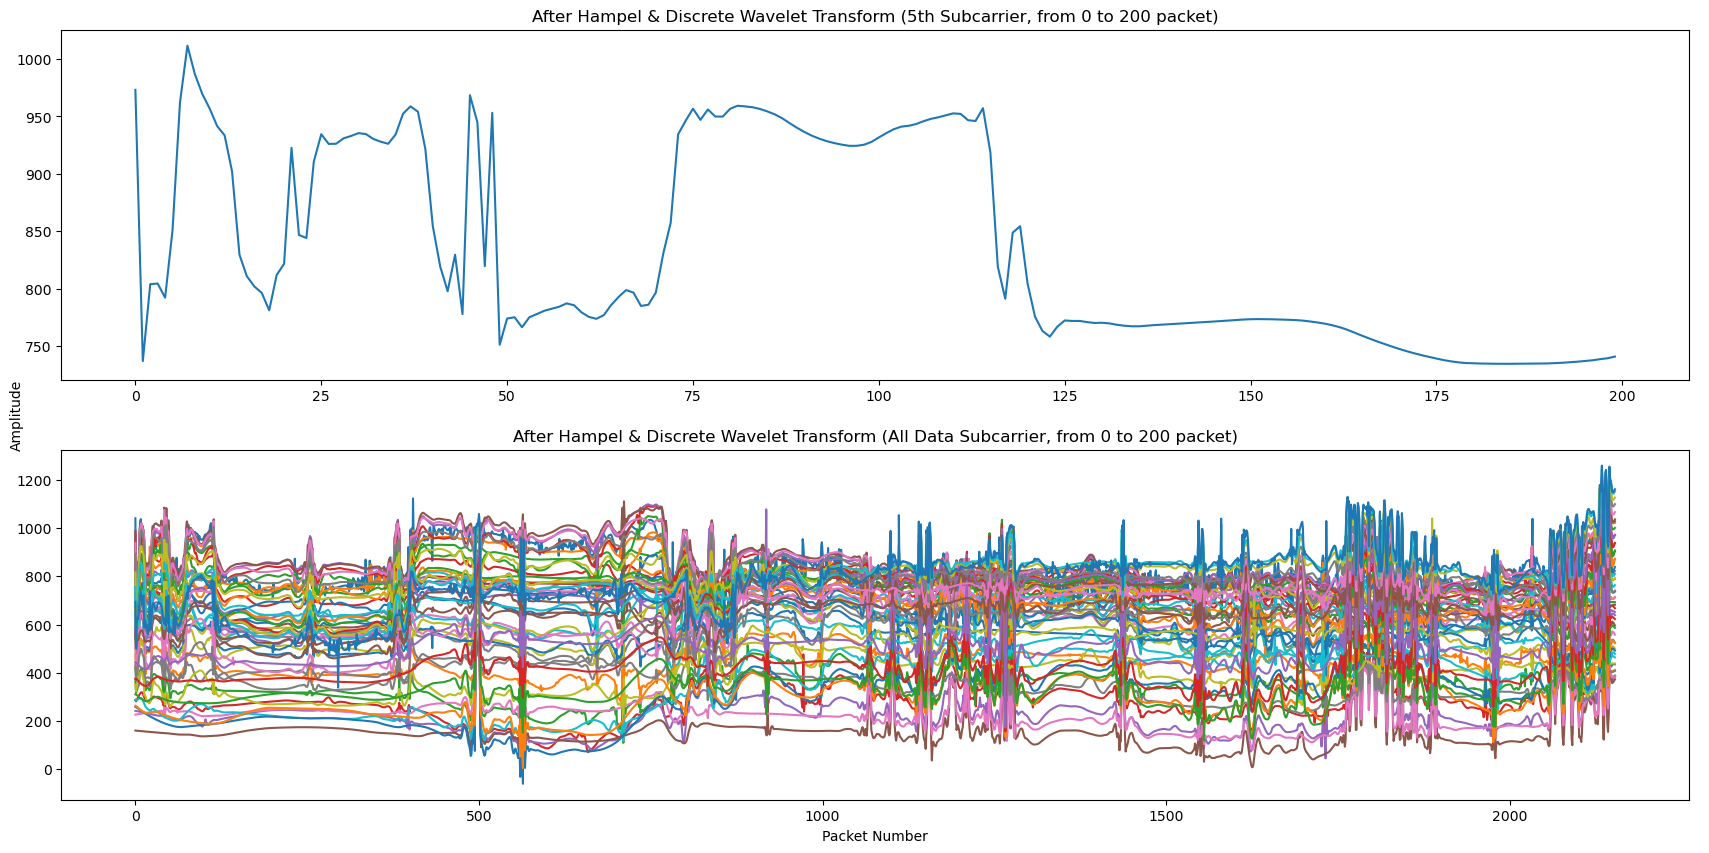

In [13]:
fig = plt.figure(figsize = (21,10))
ax = fig.add_subplot(111)

no_filter = amplitude
with_filter = filter(no_filter)

ax3 = fig.add_subplot(211)
plt.plot((with_filter)[:200, 1])
ax3.set_title("After Hampel & Discrete Wavelet Transform (5th Subcarrier, from 0 to 200 packet)")

ax4 = fig.add_subplot(212)
plt.plot((with_filter)[:, :-1])
ax4.set_title("After Hampel & Discrete Wavelet Transform (All Data Subcarrier, from 0 to 200 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('Amplitude')
ax.set_xlabel('Packet Number')

plt.show()

In [14]:
processed = pd.DataFrame(filtered)
processed.head()


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1040.635502,973.179828,913.340203,857.545640,795.821868,728.080664,667.757076,614.696625,663.222423,723.859173,...,310.827109,375.460935,442.582136,579.227318,626.866618,664.469824,666.888180,652.524547,694.312052,10244.813788
1,731.498319,736.796576,745.465645,705.749572,652.141836,605.597731,573.193249,542.416816,575.816997,617.302621,...,309.633139,374.349164,440.807248,516.840493,547.171561,561.470167,563.618159,542.505200,500.720055,10244.797234
2,855.486839,803.818685,759.105444,715.904671,660.844757,616.140431,579.616118,554.150537,592.079826,640.840112,...,308.033661,372.676872,440.437110,542.997091,564.010338,578.025767,582.578666,574.734417,603.666789,10244.780219
3,859.441575,804.403264,752.226377,714.935930,668.597940,627.087178,591.192777,566.459816,589.973140,627.166758,...,305.795040,370.113051,437.918686,544.111909,564.947107,581.845595,590.750764,590.702446,628.471629,10244.762824
4,812.706534,792.048639,765.952881,740.407681,713.941979,671.980107,634.943575,600.307637,592.995467,602.063941,...,302.914584,366.653723,434.279263,535.499326,570.096145,599.773309,615.123652,619.136638,621.839596,10244.745013


In [15]:
processed['activity'] = act
processed.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,activity
0,1040.635502,973.179828,913.340203,857.545640,795.821868,728.080664,667.757076,614.696625,663.222423,723.859173,...,375.460935,442.582136,579.227318,626.866618,664.469824,666.888180,652.524547,694.312052,10244.813788,stand
1,731.498319,736.796576,745.465645,705.749572,652.141836,605.597731,573.193249,542.416816,575.816997,617.302621,...,374.349164,440.807248,516.840493,547.171561,561.470167,563.618159,542.505200,500.720055,10244.797234,stand
2,855.486839,803.818685,759.105444,715.904671,660.844757,616.140431,579.616118,554.150537,592.079826,640.840112,...,372.676872,440.437110,542.997091,564.010338,578.025767,582.578666,574.734417,603.666789,10244.780219,stand
3,859.441575,804.403264,752.226377,714.935930,668.597940,627.087178,591.192777,566.459816,589.973140,627.166758,...,370.113051,437.918686,544.111909,564.947107,581.845595,590.750764,590.702446,628.471629,10244.762824,stand
4,812.706534,792.048639,765.952881,740.407681,713.941979,671.980107,634.943575,600.307637,592.995467,602.063941,...,366.653723,434.279263,535.499326,570.096145,599.773309,615.123652,619.136638,621.839596,10244.745013,stand


In [16]:
act_data = processed.iloc[:, :-1]
act_label = processed.iloc[:, -1]

In [17]:
act_data.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1040.635502,973.179828,913.340203,857.545640,795.821868,728.080664,667.757076,614.696625,663.222423,723.859173,...,310.827109,375.460935,442.582136,579.227318,626.866618,664.469824,666.888180,652.524547,694.312052,10244.813788
1,731.498319,736.796576,745.465645,705.749572,652.141836,605.597731,573.193249,542.416816,575.816997,617.302621,...,309.633139,374.349164,440.807248,516.840493,547.171561,561.470167,563.618159,542.505200,500.720055,10244.797234
2,855.486839,803.818685,759.105444,715.904671,660.844757,616.140431,579.616118,554.150537,592.079826,640.840112,...,308.033661,372.676872,440.437110,542.997091,564.010338,578.025767,582.578666,574.734417,603.666789,10244.780219
3,859.441575,804.403264,752.226377,714.935930,668.597940,627.087178,591.192777,566.459816,589.973140,627.166758,...,305.795040,370.113051,437.918686,544.111909,564.947107,581.845595,590.750764,590.702446,628.471629,10244.762824
4,812.706534,792.048639,765.952881,740.407681,713.941979,671.980107,634.943575,600.307637,592.995467,602.063941,...,302.914584,366.653723,434.279263,535.499326,570.096145,599.773309,615.123652,619.136638,621.839596,10244.745013


In [18]:
act_label.head()

0    stand
1    stand
2    stand
3    stand
4    stand
Name: activity, dtype: object

In [22]:
act_data.to_csv(f'../Data/Processed/{act}_data.csv', index=False, header=False)
act_label.to_csv(f'../Data/Processed/{act}_label.csv', index=False, header=False)

In [23]:
print(f'Saved {act}_data and {act}_label file')

Saved stand_data and stand_label file
